# Native Notebooks

F# is a great programming language and all, but not familiar to everyone.

Also, this kind of modelling lends itself well to use in notebooks (like this one!), and the most popular language for writing notebooks like this one is Python.

Fortunately, we can use [Fable Python](https://fable.io/Fable.Python/index.html) to transpile our F# library into Python, so that more people can take advantage.

To build this for yourself, use the `start-watch.sh` script to start the fable executable. Follow the getting started guide for [Fable](https://fable.io/) and Fable Python to install the required tooling.

Once Fable has transpiled our library, you can reference it like any other Python package.

In [9]:
import out.Model.examples as examples
from out.Model.fable_modules.fable_library.list import FSharpList
import out.Model.library as library

# Define a little helper function to build relationships in python
relationshipCases = library.relationships.cases()

def buildRelationship(name, component):
    index = relationshipCases.index(name)
    return library.relationships(index, component)

# Create our dependency service
test_dependency = library.Component(
    "test_dependency", [], "Internal", examples.random_uptime_profile(0.9))

test_service = library.Component(
    "my architecture", [buildRelationship("Requires", test_dependency)], "External", examples.random_uptime_profile(0.9))

We can now take advantage of Python packages in our notebook to model the behaviour of our architecture, or even translate it to different representations.

For example, to translate the model into a simple diagram, we'll use the [Diagrams](https://diagrams.mingrammer.com/) python package.

Making leaf for component: my architecture
Making leaf for component: test_dependency
Making branch for link: Requires


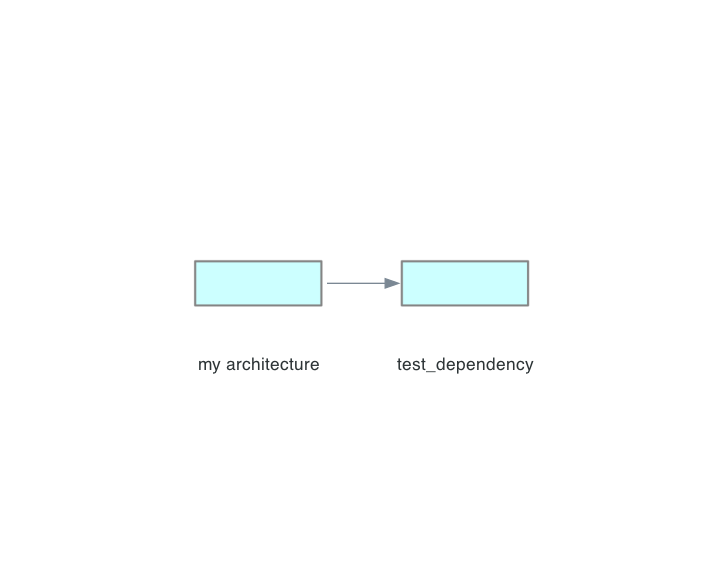

In [10]:
from diagrams import Diagram
from diagrams.programming.flowchart import Action
from out.Model import model_translations as translations


# Our library defines a `translate` function that can be used to convert a component
# We need to define steps for translating components, and relationships
def componentToDiagram (component):
    print("Making leaf for component: " + component.name)
    return Action(label=component.name)

def linkToDiagram (link, leaf):
    print("Making branch for link: " + link.name)
    return leaf

# We also need a function to determine how to build out our new representation
def joinNodes (leaf, branches):
    for branch in branches:
        leaf >> branch
    return leaf

with Diagram(show=False) as diag:
    # We can use the `translate` function to convert our component into a diagram
    translations.translate(componentToDiagram, linkToDiagram, joinNodes, test_service)

diag

And, now we have a diagram of our architecture, generated from our programmable model.